In [1]:
import numpy as np
import cupy as cp
import astropy.units as u
from astropy.io import fits
from matplotlib.patches import Rectangle, Circle
from pathlib import Path
from IPython.display import clear_output
from importlib import reload

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('INFO')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

poppy_log.disabled = True

import warnings
warnings.filterwarnings("ignore")

import cgi_phasec_poppy as cgi
from cgi_phasec_poppy import misc

from wfsc import efc_1dm as efc
from wfsc import pwp_1dm as pwp
from wfsc import utils

dm1_flat = 2*fits.getdata(cgi.data_dir/'dm-acts'/'flatmaps'/'hlc_flattened_dm1.fits')
dm2_flat = 2*fits.getdata(cgi.data_dir/'dm-acts'/'flatmaps'/'hlc_flattened_dm2.fits')


INFO:numexpr.utils:Note: detected 96 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 96 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.


0.00023164260456764313 m
7063.099208623287
0.00023164260456764313 m


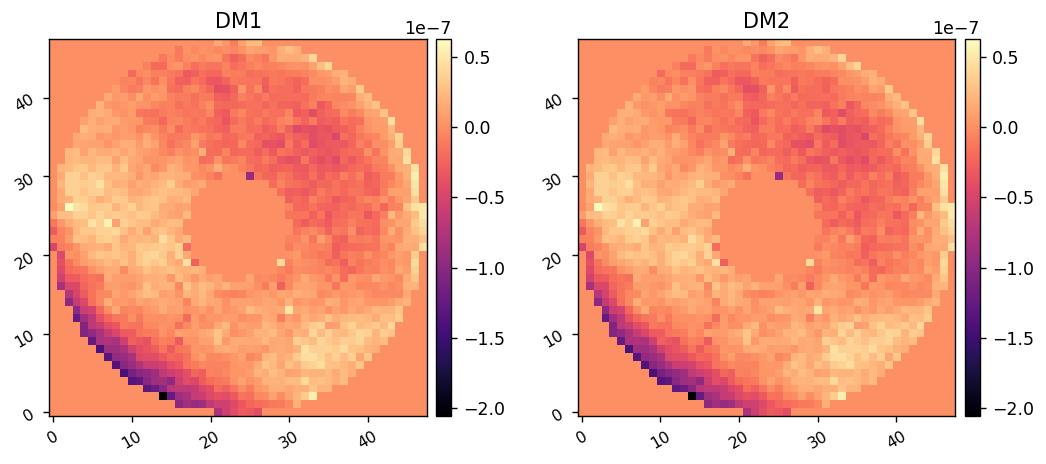

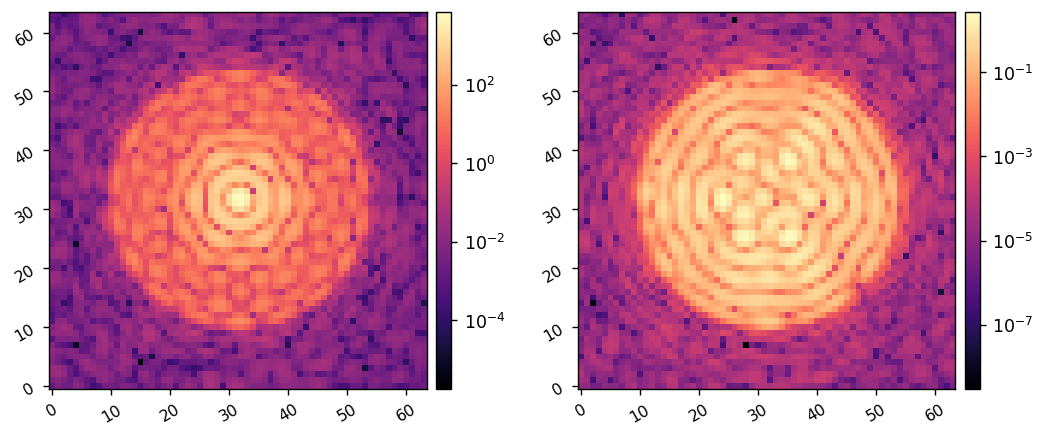

In [2]:
reload(cgi)
sys_unocc = cgi.CGI(cgi_mode='hlc', 
              use_fpm=False,
              use_pupil_defocus=False, 
              polaxis=0,
              use_opds=True,
              dm1_ref=dm1_flat, dm2_ref=dm2_flat,
             )

unocc_psf = sys_unocc.snap()

Imax_unocc = unocc_psf.max()
print(Imax_unocc)

sys = cgi.CGI(cgi_mode='hlc', 
              use_fpm=True,
              use_pupil_defocus=False, 
              polaxis=0,
              use_opds=True,
              dm1_ref=dm1_flat, dm2_ref=dm2_flat,
             )
sys.show_dms()

npsf = sys.npsf
Nact = sys.Nact

ref_psf = sys.snap()

misc.myimshow2(unocc_psf, ref_psf, lognorm1=True, lognorm2=True)

# Create the dark-hole mask

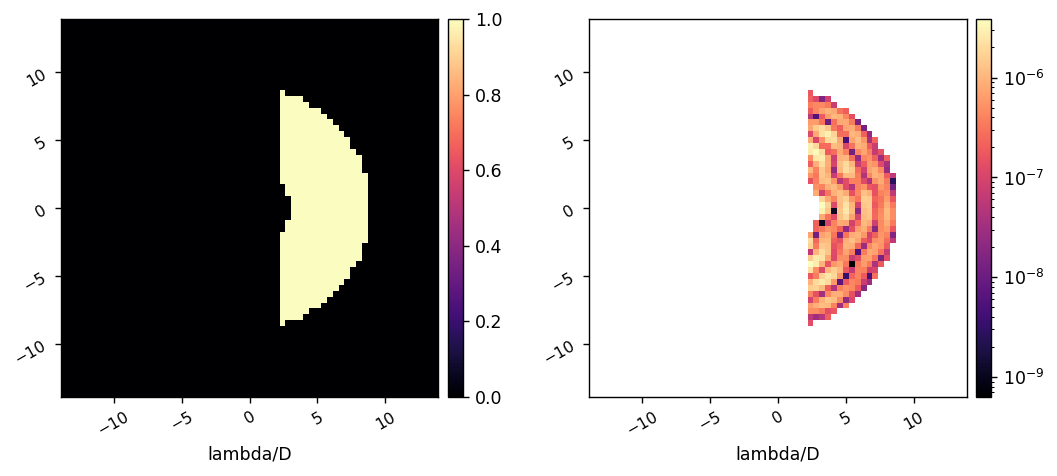

In [3]:
reload(utils)
xfp = np.linspace(-0.5, 0.5, npsf) * npsf * sys.psf_pixelscale_lamD
xf,yf = np.meshgrid(xfp,xfp)

edge = 2
iwa = 3
owa = 9
rot = 0

# Create the mask that is used to select which region to make dark.
dh_params = {
    'inner_radius' : iwa,
    'outer_radius' : owa,
    'edge_position' : edge,
    'direction' : '+x',
    'rotation':rot,
    'full':False
}
dh_mask = utils.create_annular_focal_plane_mask(xf, yf, dh_params)

nmask = dh_mask.sum()

misc.myimshow2(dh_mask, ref_psf*dh_mask,  
               pxscl1=sys.psf_pixelscale_lamD, pxscl2=sys.psf_pixelscale_lamD,
               lognorm2=True)

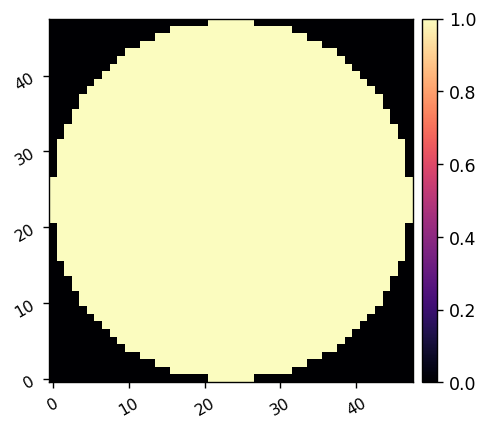

In [6]:
misc.myimshow(sys.dm_mask)

In [4]:
reload(efc)

epsilon = 1e-9 # poke amplitudes (DM surface)
jac = efc.build_jacobian(sys, epsilon, dh_mask.flatten(), display=False)

Building Jacobian.
	Calculated response for mode 1/1780. Elapsed time=0.633 sec.
	Calculated response for mode 2/1780. Elapsed time=1.260 sec.
	Calculated response for mode 3/1780. Elapsed time=1.885 sec.
	Calculated response for mode 4/1780. Elapsed time=2.511 sec.
	Calculated response for mode 5/1780. Elapsed time=3.137 sec.
	Calculated response for mode 6/1780. Elapsed time=3.853 sec.
	Calculated response for mode 7/1780. Elapsed time=4.483 sec.
	Calculated response for mode 8/1780. Elapsed time=5.113 sec.
	Calculated response for mode 9/1780. Elapsed time=5.741 sec.
	Calculated response for mode 10/1780. Elapsed time=6.372 sec.
	Calculated response for mode 11/1780. Elapsed time=7.001 sec.
	Calculated response for mode 12/1780. Elapsed time=7.628 sec.
	Calculated response for mode 13/1780. Elapsed time=8.255 sec.
	Calculated response for mode 14/1780. Elapsed time=8.883 sec.
	Calculated response for mode 15/1780. Elapsed time=9.513 sec.
	Calculated response for mode 16/1780. Elapse

	Calculated response for mode 129/1780. Elapsed time=81.151 sec.
	Calculated response for mode 130/1780. Elapsed time=81.777 sec.
	Calculated response for mode 131/1780. Elapsed time=82.403 sec.
	Calculated response for mode 132/1780. Elapsed time=83.029 sec.
	Calculated response for mode 133/1780. Elapsed time=83.654 sec.
	Calculated response for mode 134/1780. Elapsed time=84.280 sec.
	Calculated response for mode 135/1780. Elapsed time=84.907 sec.
	Calculated response for mode 136/1780. Elapsed time=85.533 sec.
	Calculated response for mode 137/1780. Elapsed time=86.161 sec.
	Calculated response for mode 138/1780. Elapsed time=86.787 sec.
	Calculated response for mode 139/1780. Elapsed time=87.412 sec.
	Calculated response for mode 140/1780. Elapsed time=88.036 sec.
	Calculated response for mode 141/1780. Elapsed time=88.663 sec.
	Calculated response for mode 142/1780. Elapsed time=89.288 sec.
	Calculated response for mode 143/1780. Elapsed time=89.914 sec.
	Calculated response for 

	Calculated response for mode 254/1780. Elapsed time=159.327 sec.
	Calculated response for mode 255/1780. Elapsed time=159.946 sec.
	Calculated response for mode 256/1780. Elapsed time=160.565 sec.
	Calculated response for mode 257/1780. Elapsed time=161.183 sec.
	Calculated response for mode 258/1780. Elapsed time=161.802 sec.
	Calculated response for mode 259/1780. Elapsed time=162.422 sec.
	Calculated response for mode 260/1780. Elapsed time=163.042 sec.
	Calculated response for mode 261/1780. Elapsed time=163.664 sec.
	Calculated response for mode 262/1780. Elapsed time=164.283 sec.
	Calculated response for mode 263/1780. Elapsed time=164.902 sec.
	Calculated response for mode 264/1780. Elapsed time=165.524 sec.
	Calculated response for mode 265/1780. Elapsed time=166.144 sec.
	Calculated response for mode 266/1780. Elapsed time=166.765 sec.
	Calculated response for mode 267/1780. Elapsed time=167.385 sec.
	Calculated response for mode 268/1780. Elapsed time=168.007 sec.
	Calculate

	Calculated response for mode 379/1780. Elapsed time=237.041 sec.
	Calculated response for mode 380/1780. Elapsed time=237.662 sec.
	Calculated response for mode 381/1780. Elapsed time=238.282 sec.
	Calculated response for mode 382/1780. Elapsed time=238.902 sec.
	Calculated response for mode 383/1780. Elapsed time=239.523 sec.
	Calculated response for mode 384/1780. Elapsed time=240.143 sec.
	Calculated response for mode 385/1780. Elapsed time=240.765 sec.
	Calculated response for mode 386/1780. Elapsed time=241.386 sec.
	Calculated response for mode 387/1780. Elapsed time=242.008 sec.
	Calculated response for mode 388/1780. Elapsed time=242.701 sec.
	Calculated response for mode 389/1780. Elapsed time=243.322 sec.
	Calculated response for mode 390/1780. Elapsed time=243.942 sec.
	Calculated response for mode 391/1780. Elapsed time=244.563 sec.
	Calculated response for mode 392/1780. Elapsed time=245.182 sec.
	Calculated response for mode 393/1780. Elapsed time=245.802 sec.
	Calculate

	Calculated response for mode 504/1780. Elapsed time=314.753 sec.
	Calculated response for mode 505/1780. Elapsed time=315.375 sec.
	Calculated response for mode 506/1780. Elapsed time=315.996 sec.
	Calculated response for mode 507/1780. Elapsed time=316.616 sec.
	Calculated response for mode 508/1780. Elapsed time=317.237 sec.
	Calculated response for mode 509/1780. Elapsed time=317.859 sec.
	Calculated response for mode 510/1780. Elapsed time=318.479 sec.
	Calculated response for mode 511/1780. Elapsed time=319.101 sec.
	Calculated response for mode 512/1780. Elapsed time=319.721 sec.
	Calculated response for mode 513/1780. Elapsed time=320.342 sec.
	Calculated response for mode 514/1780. Elapsed time=321.034 sec.
	Calculated response for mode 515/1780. Elapsed time=321.655 sec.
	Calculated response for mode 516/1780. Elapsed time=322.273 sec.
	Calculated response for mode 517/1780. Elapsed time=322.892 sec.
	Calculated response for mode 518/1780. Elapsed time=323.512 sec.
	Calculate

	Calculated response for mode 629/1780. Elapsed time=392.481 sec.
	Calculated response for mode 630/1780. Elapsed time=393.101 sec.
	Calculated response for mode 631/1780. Elapsed time=393.720 sec.
	Calculated response for mode 632/1780. Elapsed time=394.339 sec.
	Calculated response for mode 633/1780. Elapsed time=394.960 sec.
	Calculated response for mode 634/1780. Elapsed time=395.579 sec.
	Calculated response for mode 635/1780. Elapsed time=396.198 sec.
	Calculated response for mode 636/1780. Elapsed time=396.818 sec.
	Calculated response for mode 637/1780. Elapsed time=397.439 sec.
	Calculated response for mode 638/1780. Elapsed time=398.062 sec.
	Calculated response for mode 639/1780. Elapsed time=398.681 sec.
	Calculated response for mode 640/1780. Elapsed time=399.301 sec.
	Calculated response for mode 641/1780. Elapsed time=399.921 sec.
	Calculated response for mode 642/1780. Elapsed time=400.543 sec.
	Calculated response for mode 643/1780. Elapsed time=401.163 sec.
	Calculate

	Calculated response for mode 754/1780. Elapsed time=470.123 sec.
	Calculated response for mode 755/1780. Elapsed time=470.742 sec.
	Calculated response for mode 756/1780. Elapsed time=471.360 sec.
	Calculated response for mode 757/1780. Elapsed time=471.980 sec.
	Calculated response for mode 758/1780. Elapsed time=472.600 sec.
	Calculated response for mode 759/1780. Elapsed time=473.221 sec.
	Calculated response for mode 760/1780. Elapsed time=473.840 sec.
	Calculated response for mode 761/1780. Elapsed time=474.460 sec.
	Calculated response for mode 762/1780. Elapsed time=475.079 sec.
	Calculated response for mode 763/1780. Elapsed time=475.698 sec.
	Calculated response for mode 764/1780. Elapsed time=476.318 sec.
	Calculated response for mode 765/1780. Elapsed time=476.936 sec.
	Calculated response for mode 766/1780. Elapsed time=477.557 sec.
	Calculated response for mode 767/1780. Elapsed time=478.175 sec.
	Calculated response for mode 768/1780. Elapsed time=478.795 sec.
	Calculate

	Calculated response for mode 879/1780. Elapsed time=547.719 sec.
	Calculated response for mode 880/1780. Elapsed time=548.338 sec.
	Calculated response for mode 881/1780. Elapsed time=548.960 sec.
	Calculated response for mode 882/1780. Elapsed time=549.581 sec.
	Calculated response for mode 883/1780. Elapsed time=550.201 sec.
	Calculated response for mode 884/1780. Elapsed time=550.821 sec.
	Calculated response for mode 885/1780. Elapsed time=551.441 sec.
	Calculated response for mode 886/1780. Elapsed time=552.061 sec.
	Calculated response for mode 887/1780. Elapsed time=552.680 sec.
	Calculated response for mode 888/1780. Elapsed time=553.299 sec.
	Calculated response for mode 889/1780. Elapsed time=553.921 sec.
	Calculated response for mode 890/1780. Elapsed time=554.540 sec.
	Calculated response for mode 891/1780. Elapsed time=555.161 sec.
	Calculated response for mode 892/1780. Elapsed time=555.850 sec.
	Calculated response for mode 893/1780. Elapsed time=556.470 sec.
	Calculate

	Calculated response for mode 1004/1780. Elapsed time=625.447 sec.
	Calculated response for mode 1005/1780. Elapsed time=626.067 sec.
	Calculated response for mode 1006/1780. Elapsed time=626.689 sec.
	Calculated response for mode 1007/1780. Elapsed time=627.309 sec.
	Calculated response for mode 1008/1780. Elapsed time=627.929 sec.
	Calculated response for mode 1009/1780. Elapsed time=628.550 sec.
	Calculated response for mode 1010/1780. Elapsed time=629.172 sec.
	Calculated response for mode 1011/1780. Elapsed time=629.793 sec.
	Calculated response for mode 1012/1780. Elapsed time=630.416 sec.
	Calculated response for mode 1013/1780. Elapsed time=631.036 sec.
	Calculated response for mode 1014/1780. Elapsed time=631.658 sec.
	Calculated response for mode 1015/1780. Elapsed time=632.351 sec.
	Calculated response for mode 1016/1780. Elapsed time=632.973 sec.
	Calculated response for mode 1017/1780. Elapsed time=633.593 sec.
	Calculated response for mode 1018/1780. Elapsed time=634.212 

	Calculated response for mode 1127/1780. Elapsed time=701.967 sec.
	Calculated response for mode 1128/1780. Elapsed time=702.587 sec.
	Calculated response for mode 1129/1780. Elapsed time=703.205 sec.
	Calculated response for mode 1130/1780. Elapsed time=703.826 sec.
	Calculated response for mode 1131/1780. Elapsed time=704.444 sec.
	Calculated response for mode 1132/1780. Elapsed time=705.064 sec.
	Calculated response for mode 1133/1780. Elapsed time=705.684 sec.
	Calculated response for mode 1134/1780. Elapsed time=706.302 sec.
	Calculated response for mode 1135/1780. Elapsed time=706.920 sec.
	Calculated response for mode 1136/1780. Elapsed time=707.538 sec.
	Calculated response for mode 1137/1780. Elapsed time=708.155 sec.
	Calculated response for mode 1138/1780. Elapsed time=708.775 sec.
	Calculated response for mode 1139/1780. Elapsed time=709.395 sec.
	Calculated response for mode 1140/1780. Elapsed time=710.014 sec.
	Calculated response for mode 1141/1780. Elapsed time=710.632 

	Calculated response for mode 1250/1780. Elapsed time=778.398 sec.
	Calculated response for mode 1251/1780. Elapsed time=779.019 sec.
	Calculated response for mode 1252/1780. Elapsed time=779.638 sec.
	Calculated response for mode 1253/1780. Elapsed time=780.256 sec.
	Calculated response for mode 1254/1780. Elapsed time=780.875 sec.
	Calculated response for mode 1255/1780. Elapsed time=781.494 sec.
	Calculated response for mode 1256/1780. Elapsed time=782.114 sec.
	Calculated response for mode 1257/1780. Elapsed time=782.732 sec.
	Calculated response for mode 1258/1780. Elapsed time=783.350 sec.
	Calculated response for mode 1259/1780. Elapsed time=783.969 sec.
	Calculated response for mode 1260/1780. Elapsed time=784.589 sec.
	Calculated response for mode 1261/1780. Elapsed time=785.208 sec.
	Calculated response for mode 1262/1780. Elapsed time=785.828 sec.
	Calculated response for mode 1263/1780. Elapsed time=786.446 sec.
	Calculated response for mode 1264/1780. Elapsed time=787.065 

	Calculated response for mode 1373/1780. Elapsed time=854.803 sec.
	Calculated response for mode 1374/1780. Elapsed time=855.421 sec.
	Calculated response for mode 1375/1780. Elapsed time=856.040 sec.
	Calculated response for mode 1376/1780. Elapsed time=856.660 sec.
	Calculated response for mode 1377/1780. Elapsed time=857.281 sec.
	Calculated response for mode 1378/1780. Elapsed time=857.901 sec.
	Calculated response for mode 1379/1780. Elapsed time=858.522 sec.
	Calculated response for mode 1380/1780. Elapsed time=859.146 sec.
	Calculated response for mode 1381/1780. Elapsed time=859.767 sec.
	Calculated response for mode 1382/1780. Elapsed time=860.390 sec.
	Calculated response for mode 1383/1780. Elapsed time=861.080 sec.
	Calculated response for mode 1384/1780. Elapsed time=861.700 sec.
	Calculated response for mode 1385/1780. Elapsed time=862.319 sec.
	Calculated response for mode 1386/1780. Elapsed time=862.938 sec.
	Calculated response for mode 1387/1780. Elapsed time=863.558 

	Calculated response for mode 1496/1780. Elapsed time=931.301 sec.
	Calculated response for mode 1497/1780. Elapsed time=931.921 sec.
	Calculated response for mode 1498/1780. Elapsed time=932.543 sec.
	Calculated response for mode 1499/1780. Elapsed time=933.162 sec.
	Calculated response for mode 1500/1780. Elapsed time=933.782 sec.
	Calculated response for mode 1501/1780. Elapsed time=934.401 sec.
	Calculated response for mode 1502/1780. Elapsed time=935.021 sec.
	Calculated response for mode 1503/1780. Elapsed time=935.641 sec.
	Calculated response for mode 1504/1780. Elapsed time=936.261 sec.
	Calculated response for mode 1505/1780. Elapsed time=936.882 sec.
	Calculated response for mode 1506/1780. Elapsed time=937.501 sec.
	Calculated response for mode 1507/1780. Elapsed time=938.125 sec.
	Calculated response for mode 1508/1780. Elapsed time=938.745 sec.
	Calculated response for mode 1509/1780. Elapsed time=939.368 sec.
	Calculated response for mode 1510/1780. Elapsed time=939.989 

	Calculated response for mode 1619/1780. Elapsed time=1007.773 sec.
	Calculated response for mode 1620/1780. Elapsed time=1008.393 sec.
	Calculated response for mode 1621/1780. Elapsed time=1009.013 sec.
	Calculated response for mode 1622/1780. Elapsed time=1009.631 sec.
	Calculated response for mode 1623/1780. Elapsed time=1010.248 sec.
	Calculated response for mode 1624/1780. Elapsed time=1010.868 sec.
	Calculated response for mode 1625/1780. Elapsed time=1011.488 sec.
	Calculated response for mode 1626/1780. Elapsed time=1012.108 sec.
	Calculated response for mode 1627/1780. Elapsed time=1012.730 sec.
	Calculated response for mode 1628/1780. Elapsed time=1013.350 sec.
	Calculated response for mode 1629/1780. Elapsed time=1013.970 sec.
	Calculated response for mode 1630/1780. Elapsed time=1014.589 sec.
	Calculated response for mode 1631/1780. Elapsed time=1015.210 sec.
	Calculated response for mode 1632/1780. Elapsed time=1015.828 sec.
	Calculated response for mode 1633/1780. Elapsed

	Calculated response for mode 1740/1780. Elapsed time=1082.891 sec.
	Calculated response for mode 1741/1780. Elapsed time=1083.510 sec.
	Calculated response for mode 1742/1780. Elapsed time=1084.128 sec.
	Calculated response for mode 1743/1780. Elapsed time=1084.747 sec.
	Calculated response for mode 1744/1780. Elapsed time=1085.368 sec.
	Calculated response for mode 1745/1780. Elapsed time=1085.986 sec.
	Calculated response for mode 1746/1780. Elapsed time=1086.606 sec.
	Calculated response for mode 1747/1780. Elapsed time=1087.227 sec.
	Calculated response for mode 1748/1780. Elapsed time=1087.846 sec.
	Calculated response for mode 1749/1780. Elapsed time=1088.465 sec.
	Calculated response for mode 1750/1780. Elapsed time=1089.083 sec.
	Calculated response for mode 1751/1780. Elapsed time=1089.701 sec.
	Calculated response for mode 1752/1780. Elapsed time=1090.321 sec.
	Calculated response for mode 1753/1780. Elapsed time=1090.941 sec.
	Calculated response for mode 1754/1780. Elapsed

In [5]:
jac_dir = Path('/groups/douglase/kians-data-files/roman-cgi-iefc-data/jacobians')
fname = 'hlc_39_opds_flatmaps'

misc.save_pickle(jac_dir/fname, jac, quiet=False)

Saved data to:  /groups/douglase/kians-data-files/roman-cgi-iefc-data/jacobians/hlc_39_opds_flatmaps


In [7]:
jac_dir = Path('/groups/douglase/kians-data-files/roman-cgi-iefc-data/jacobians')
fname = 'hlc_39_opds_flatmaps'

jac = misc.load_pickle(jac_dir/fname)
jac.shape

(872, 1780)

# Generate probes and test PWP

Generating probe with amplitude=1.438e-08, radius=14.0, phase=0.000, offset=(-12.0,-12.0), with discontinuity along x axis.
Generating probe with amplitude=1.438e-08, radius=14.0, phase=1.571, offset=(-12.0,-12.0), with discontinuity along y axis.


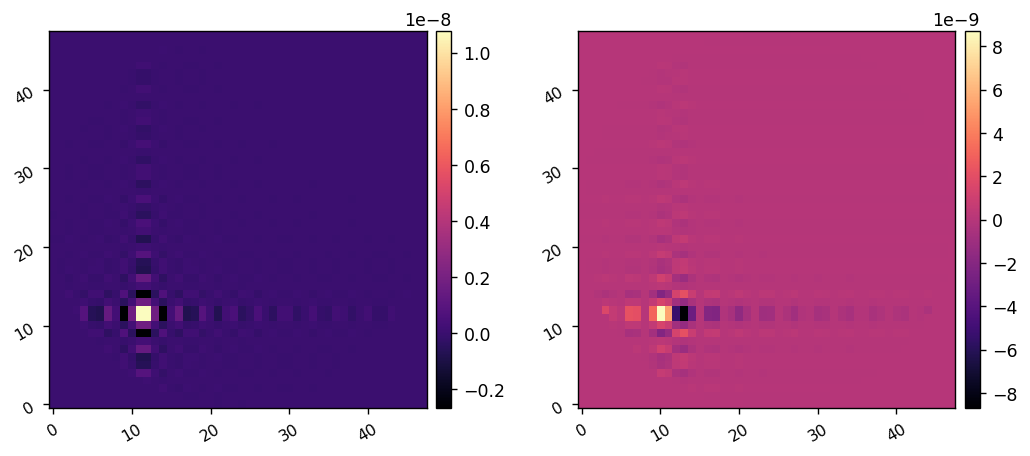

In [10]:
reload(pwp)

Npairs = 2
probe_amp = 0.025*sys.wavelength_c.value
probe_radius = 14
probe_offset = (-12,-12)

probes = pwp.create_sinc_probes(Npairs, Nact, sys.dm_mask, probe_amp, probe_radius, probe_offset, display=True)


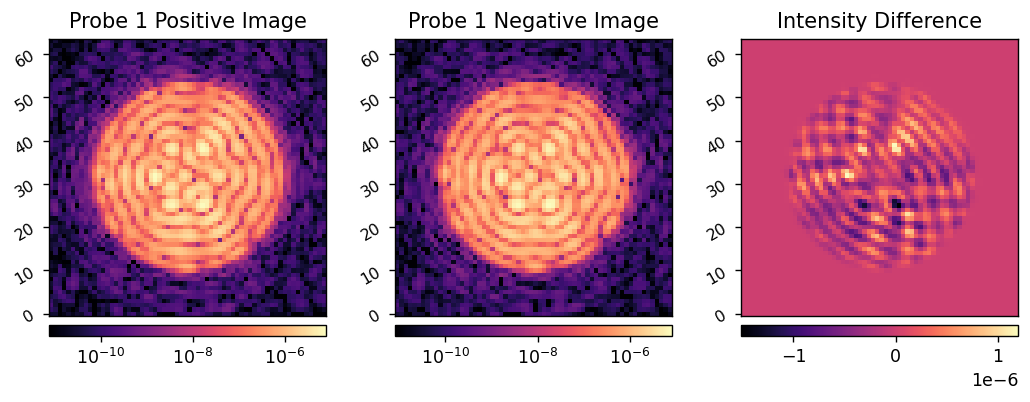

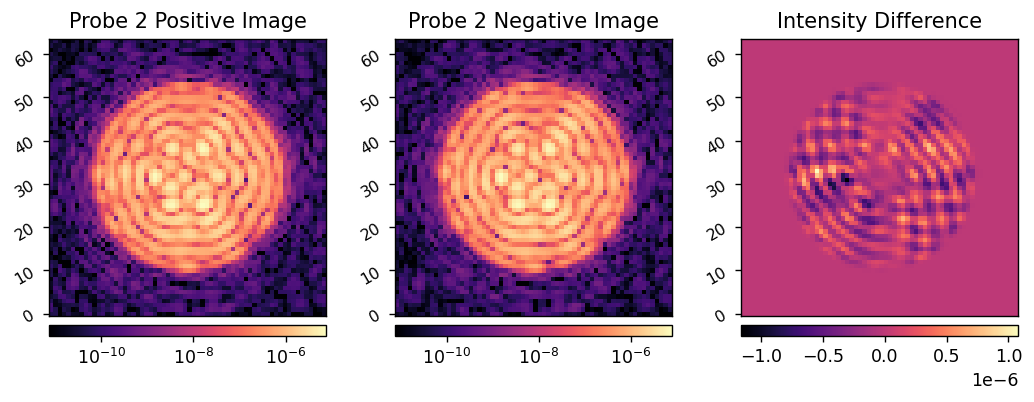

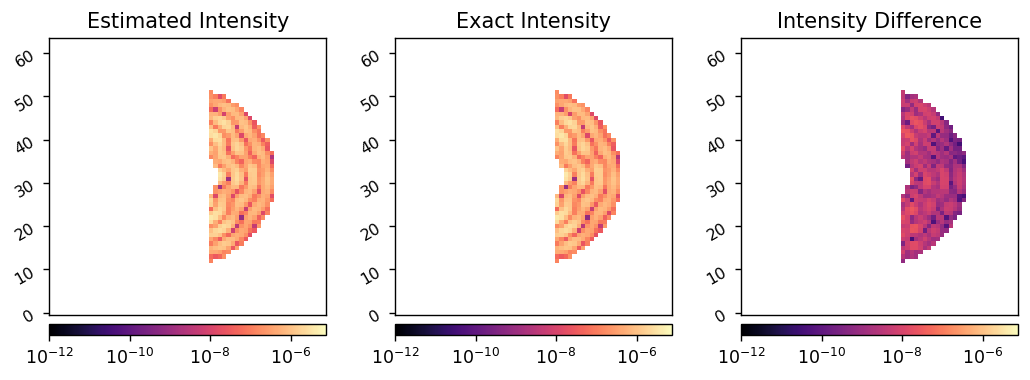

(6.548080399903869e-07, 4.778535364434271e-09)

In [14]:
reload(pwp)

sys.reset_dms()
E_est = pwp.run_pwp_bp(sys, dh_mask, probes, use='j', jacobian=jac/2, display=True)
# E_est = pwp.run_pwp_bp(sys, probes, dh_mask, use='m', model=sys, use_noise=False, display=True)
# E_est = pwp.run_pwp_new(sys, probes, dh_mask, use='j', jacobian=jac/2, use_noise=False, display=True)
# E_est = pwp.run_pwp_new(sys, probes, dh_mask, use='m', model=sys, use_noise=False, display=True)
diff = abs(ref_psf*dh_mask - np.abs(E_est)**2)

vmin = 1e-12
vmax = ref_psf.max()
misc.myimshow3(np.abs(E_est)**2, 
               ref_psf*dh_mask, diff,
               'Estimated Intensity', 'Exact Intensity', 'Intensity Difference',
               lognorm1=True, lognorm2=True, lognorm3=True,
               vmin1=vmin, vmin2=vmin, vmin3=vmin,
               vmax1=vmax, vmax2=vmax, vmax3=vmax, 
              )

np.mean(ref_psf[dh_mask]), np.mean(diff[dh_mask])

# Setup regularization scheme

In [23]:
reload(utils)
reload(pwp)

pwp_fun = pwp.run_pwp_bp
pwp_kwargs = {'probes':probes, 'use':'j', 'jacobian':jac/2, 
              'display':False, 'display_probe_field':False}

reg_fun = utils.beta_reg
reg_conds = np.array([[0, 25, 30, 40, 45, 60],
                      [-2, -4, -2, -5, -2, -2]]) # beta=-4 is the same as 5e-3 for tikhonov

# Run EFC with PWP

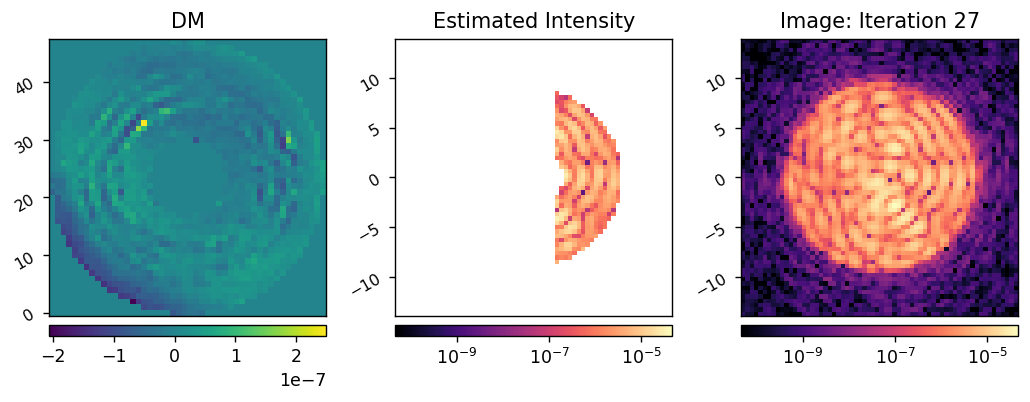

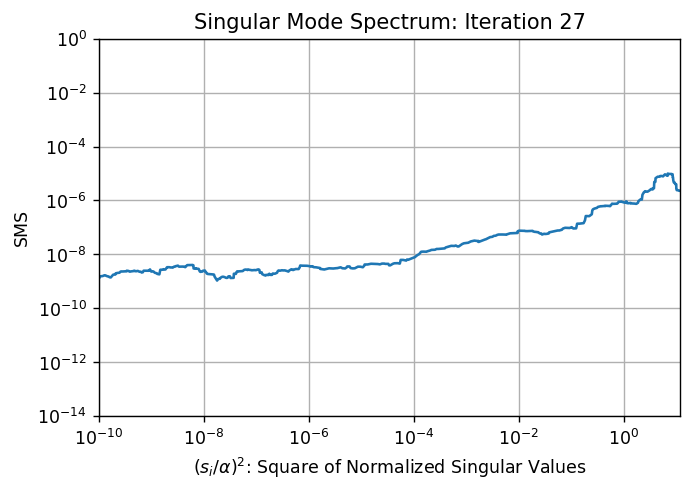

	Running iteration 28/60.
EFC interrupted.
EFC completed in 65.072 sec.


In [25]:
reload(efc)
# re
sys.reset_dms()
commands2, efields2, images2 = efc.run_efc_pwp(sys, 
                                               pwp_fun,
                                               pwp_kwargs,
                                               jac,
                                               reg_fun,
                                               reg_conds,
                                               dh_mask, 
                                               Imax_unocc,
                                               iterations=60, 
                                               display_current=True, 
#                                                display_all=True,
                                               plot_sms=True)